In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import keras
import numpy as np

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.datasets.cifar import load_batch
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import tf_export

from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from keras.models import Sequential

/home/kabir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_data(label_mode='fine'):
    if label_mode not in ['fine', 'coarse']:
        raise ValueError('`label_mode` must be one of `"fine"`, `"coarse"`.')
    
    path = "/home/kabir/.keras/datasets/cifar-100-python"
    fpath = os.path.join(path, 'train')
    x_train, y_train = load_batch(fpath, label_key=label_mode + '_labels')

    fpath = os.path.join(path, 'test')
    x_test, y_test = load_batch(fpath, label_key=label_mode + '_labels')

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train = x_train.astype('float32')

In [5]:
x_train /= 255.

In [6]:
model = Sequential()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
data_format = K.image_data_format()
print(data_format)

channels_last


In [9]:
num_classes = 100
img_rows, img_cols = 32, 32
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

In [10]:
model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())

In [11]:
def nice_img_printer(model, img):
    '''returns the img as a 2d array'''
    exp_img = np.expand_dims(img,axis=0)
    conv_img = model.predict(exp_img)

    conv_img = np.squeeze(conv_img, axis=0)
    conv_img = np.reshape(conv_img, (-1, 14))
    return conv_img

(14, 14)


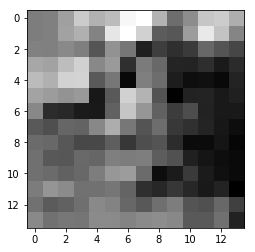

In [16]:
img = x_train[0]
img = nice_img_printer(model, img)

import matplotlib.pyplot as plt
print(img.shape)
plt.imshow(img, cmap='gray')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 1)         28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [18]:
import time
initial_time = time.time()
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = nice_img_printer(model, img)
reduction_time = time.time() - initial_time
print(reduction_time)

74.44440841674805


In [19]:
half_initial_time = time.time()
for i in range(x_train.shape[0] // 2):
    img = x_train[i]
    img = nice_img_printer(model, img)
half_reduction_time = time.time() - half_initial_time
print(half_reduction_time)

45.09548377990723


In [20]:
quarter_initial_time = time.time()
for i in range(x_train.shape[0] // 4):
    img = x_train[i]
    img = nice_img_printer(model, img)
quarter_reduction_time = time.time() - quarter_initial_time
print(quarter_reduction_time)

20.38350772857666


In [21]:
by6_initial_time = time.time()
for i in range(x_train.shape[0] // 6):
    img = x_train[i]
    img = nice_img_printer(model, img)
by6_reduction_time = time.time() - by6_initial_time
print(by6_reduction_time)

12.966588497161865


In [22]:
by8_initial_time = time.time()
for i in range(x_train.shape[0] // 8):
    img = x_train[i]
    img = nice_img_printer(model, img)
by8_reduction_time = time.time() - by8_initial_time
print(by8_reduction_time)

11.484248876571655


In [23]:
by10_initial_time = time.time()
for i in range(x_train.shape[0] // 10):
    img = x_train[i]
    img = nice_img_printer(model, img)
by10_reduction_time = time.time() - by10_initial_time
print(by10_reduction_time)

6.878881216049194


In [24]:
by16_initial_time = time.time()
for i in range(x_train.shape[0] // 16):
    img = x_train[i]
    img = nice_img_printer(model, img)
by16_reduction_time = time.time() - by16_initial_time
print(by16_reduction_time)

4.531256437301636


In [25]:
by32_initial_time = time.time()
for i in range(x_train.shape[0] // 32):
    img = x_train[i]
    img = nice_img_printer(model, img)
by32_reduction_time = time.time() - by32_initial_time
print(by32_reduction_time)

2.2620344161987305
